<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/ML_Classification_Project/blob/main/ML_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member - Rooban J**


# **Project Summary -**

* The Project is done on dataset from mobile phone industry to predict and analyse the price range, because this field is highly competitive and challenging, variation in the price of a mobile phone is determined by various factors like battery power, clock speed, sim count, memory, camera quality, screen size, and more. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.

* This Study has followed multiple steps to build a model. Such as Data Wrangling, Data Visualization, Feature Engineering, Model Fitting.. As we see, process begins with DATA WRANGLING, where missing values were handled and unique values were checked. We identified that 180 phones had pixel resolution height (px_height) as 0 and two phones had screen width (sc_w) in cm as 0. The minimum value of px_height and sc_w should not be 0, because it does not make sense for a phone screen width or pixel height to be 0. Therefore, those 0 values are replaced with the mean values, ensuring that no missing values were left in the dataset.

* Next part of the analysis is EXPLORATORY DATA ANALYSIS (EDA), which revealed that all category phones were distributed with equal price range. The analysis also indicated that battery capacity was positively correlated with the price range of mobile phones, and the distribution of battery capacity gradually increased with the price range. This suggested that consumers may be willing to pay more for a mobile phone with a higher battery capacity. From the graph, we found that around 50% of the devices had Bluetooth option and the scatter plot showed a clear positive correlation between RAM and Price range.

* Scatter plot indicates that when the price range increased, the amount of RAM in the device generally increased as well. The study also shows that the price of devices with dual sim was positively correlated. Additionally, the distribution of primary camera megapixels across different target categories was relatively consistent, indicating that this camera feature may not significantly influence the price of mobile phones. The study also found that mobile phones with higher price ranges tended to be lighter in weight compared to lower price range phones.

* Next stop of the study is to handle outliers for that, we performed HYPOTHESIS TESTING on three features. The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. Then we performed FEATURE ENGINEERING to implement Machine Learning Models.

* In this study we built ML Models such as LOGISTIC REGRESSION, XGBoost and RANDOM FOREST. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameters tuning yielded the best results in predicting the price range of mobile phones.

* In conclusion, We found some results from EDA like what are all the features are positively correlated and about the features which are influencing the deflection in price of mobile phones. Finally, we built ML models for predicting the price range of mobile phones and from the study we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provided the best performance.



# **GitHub Link -**

https://github.com/Rooban-Jeyasundar/ML_Classification_Project.git

# **Problem Statement**


**In this study, we discuss about highly competitive mobile phone market.From the analysis companies want to understand about the factors that influencing the mobile price and the growth in sales of mobile phones. The main objective of this study is to find out the relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and In Classification model, we are not going to predict the actual price but we study about price range indicating features.**



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Import Libraries for data cleaning and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for scaling, transforming, and modeling processes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving data_mobile_price_range.csv to data_mobile_price_range.csv


### Dataset First View

In [ ]:
# Dataset First Look
import io
mobile_df = pd.read_csv((io.BytesIO(uploaded['data_mobile_price_range.csv'])),encoding='unicode_escape')
print(mobile_df.sample(10))

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1577            999     0          1.7         0   6       0          49   
1532            970     1          1.3         1   5       0          59   
568            1288     0          2.8         1  15       0          50   
979            1866     1          2.5         1   3       1          47   
332            1730     0          2.0         1   0       1          20   
1733           1163     1          2.1         1   0       1          19   
287            1563     0          2.4         0   0       1          24   
787            1848     1          1.4         1   2       1          42   
1786            930     1          0.5         1   3       1          34   
1197           1129     1          2.8         1   0       0          49   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1577    0.6        132        1  ...        608      1970  1598     7     0   
1532 

In [ ]:
mobile_df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Shape of Dataset',mobile_df.shape)
print('Count of Rows',mobile_df.shape[0])
print('Count of Columns',mobile_df.shape[1])

Shape of Dataset (2000, 21)
Count of Rows 2000
Count of Columns 21


### Dataset Information

In [ ]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Does data have any duplicate values ?",mobile_df.duplicated())

print('Count of Duplicate values',len(mobile_df[mobile_df.duplicated()]))

Does data have any duplicate values ? 0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool
Count of Duplicate values 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

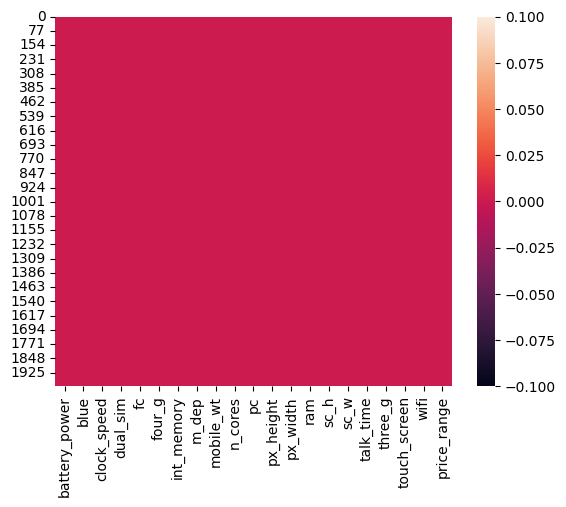

In [ ]:
# Visualizing the missing values on a heatmap
sns.heatmap(mobile_df.isnull())

### What did you know about your dataset?

* We clearly see there are no indication in the Heatmap which means No Null Values in the dataset.

* As observation, we found that 21 Columns and 2000 Rows are in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#No. of columns/features
len(mobile_df.columns)

21

In [ ]:
# Dataset Describe and Transpose
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

**Battery_power** - Total energy a battery can store in one time measured in mAh.

**Blue** - Has bluetooth or not.

**Clock_speed** - speed at which microprocessor executes instructions.

**Dual_sim** - Has dual sim support or not.

**Fc** - Front Camera mega pixels.

**Four_g** - Has 4G or not.

**Int_memory** - Internal Memory in Gigabytes.

**M_dep** - Mobile Depth in cm.

**Mobile_wt** - Weight of mobile phone.

**N_cores** - Number of cores of processor.

**Pc** - Primary Camera mega pixels.

**Px_height** - Pixel Resolution Height.

**Px_width** - Pixel Resolution Width.

**Ram** - Random Access Memory in Mega.

**Touch_screen** - Has touch screen or not.

**Wifi** - Has wifi or not.

**Sc_h** - Screen Height of mobile in cm.

**Sc_w** - Screen Width of mobile in cm.

**Talk_time** - longest time that a single battery charge will last when you are.

**Three_g** - Has 3G or not.

**Wifi** - Has wifi or not.

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values
mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
# Check Unique Values for each variable.
print("Unique values coulmn-wise")
for column in mobile_df.columns:
  unique_values = mobile_df[column].unique()
  print(f"{column}:{unique_values}")

Unique values coulmn-wise
battery_power:[ 842 1021  563 ... 1139 1467  858]
blue:[0 1]
clock_speed:[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim:[0 1]
fc:[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g:[0 1]
int_memory:[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep:[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt:[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
 

## 3. ***Data Wrangling***

In [ ]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Here px_height (pixel resolution height) and sc_w (screen width) shouldn't be zero because it doesn't add any value to the analysis
#So to avoid error in analysis, we are handling those values with respective mean.

#viewing the count & replacing 0 with mean value
px_height_error = sum(mobile_df.px_height == 0)
print(f"Zero values in px_height column = {px_height_error}")

px_height_mean = mobile_df.px_height.mean()
mobile_df.px_height = np.where(mobile_df.px_height==0,px_height_mean,mobile_df.px_height)
print(mobile_df)

Zero values in px_height column = 2
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px

In [ ]:
#viewing the count & replacing 0 with mean value
sc_w_error = sum(mobile_df.sc_w == 0)
print(f"Zero values in px_height column = {sc_w_error}")

sc_w_mean = mobile_df.sc_w.mean()
mobile_df.sc_w = np.where(mobile_df.sc_w==0,sc_w_mean,mobile_df.sc_w)
print(mobile_df)

Zero values in px_height column = 180
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  

In [ ]:
#checking the duplicate value count
duplicate_value = len(mobile_df[mobile_df.duplicated()])
print(f"count of total duplicate values in all columns : {duplicate_value} ")
#Count of null values in each column
mobile_df.isnull().sum()

count of total duplicate values in all columns : 0 


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What all manipulations have you done and insights you found?

**Observations**

**1**.From the study we have found that number of phones with pixel resolution height and screen width of mobile in cm are having 180 and 2 entries contains 0 values respectively.

**2**.The minimum value of px_height and sc_w should not be 0, because it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for the solutions and handle these cases appropriately to avoid any issues during our analysis.

**3**.So we replaced the Zero (0) values with the mean values and no missing values left in the table so we make sure that our data is ready for data analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Price Range

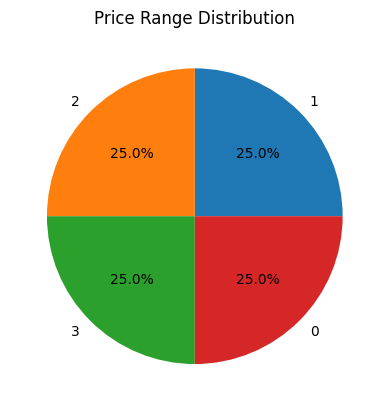

In [ ]:
# Chart - 1 visualization code
price_count = mobile_df['price_range'].value_counts()
plt.pie(price_count,labels=price_count.index,autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts mostly useful to view the distribution of the data.

Here we know about the distribution of percentage of phones with price range from low to high.

##### 2. What is/are the insight(s) found from the chart?

Regarding the insights, we found that all categories of mobiles are equally distributed on price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

From the chart, we are able to know about the distribution of phones in percentage on its price range.

#### Chart - 2
Battery Power

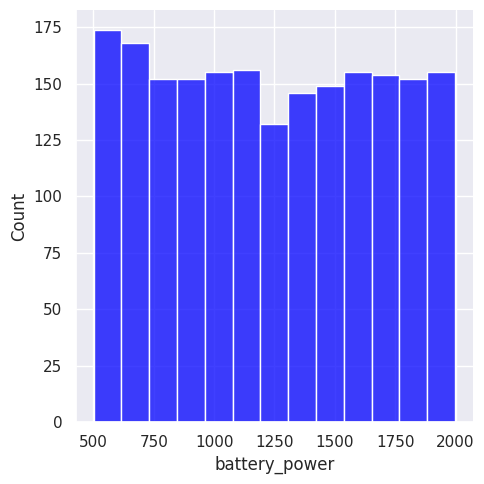

In [ ]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(mobile_df['battery_power'],color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

Here Bar chart is used to know about the distribution of count is increased with respect to battery power or not.

##### 2. What is/are the insight(s) found from the chart?

This above chart visualizes how the battery power (mAh), is distributed across the mobile counts in the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights gained from analyzing the relationship between the battery capacity and the price of a mobile phone can potentially lead to a positive business impact, which means there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

#### Chart - 3
Bluetooth

<Axes: xlabel='blue', ylabel='price_range'>

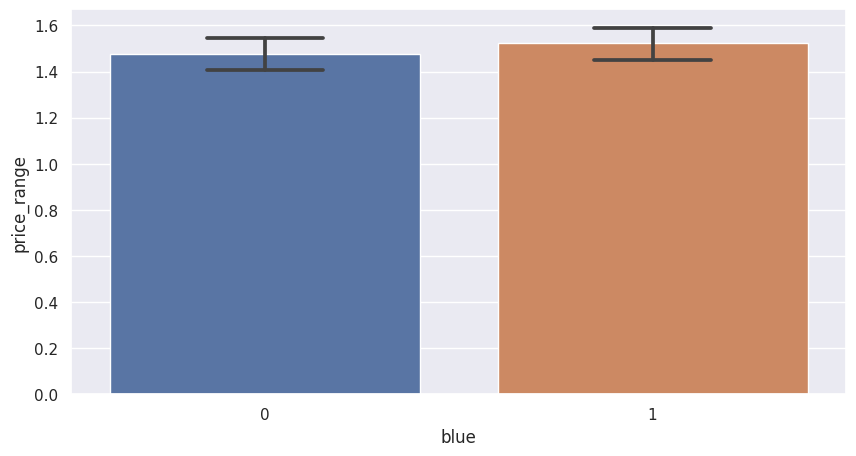

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=mobile_df,x='blue',y='price_range',ax=ax,capsize=0.3)


##### 1. Why did you pick the specific chart?

Generally bar charts are used to know about the distribution of values in the dataset. Here we saw the distribution of bluetooth along the price.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we found that almost half the devices have Bluetooth option, and half of them don’t.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we get both kind of insights from the observation because almost half of the devices in the dataset have option of Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could use this insight to understand that customers value the presence of Bluetooth in their devices and therefore may prioritize investing in the development of Bluetooth-related features or promoting the presence of Bluetooth in their marketing efforts.

On the other end, this observation could also have negative consequences if a company misinterprets or misunderstood this information. For an instance, a company might assume that including Bluetooth in their devices is not important because half of the devices in the dataset do not have it. However, this conclusion ignores the fact that many customers still value the presence of Bluetooth in their devices, and a manufacturer that fails to include Bluetooth in their devices could miss out on potential sales and growth opportunities. Therefore, it is important to interpret this information carefully and use it in a way that aligns with customer preferences and market trends.

#### Chart - 4


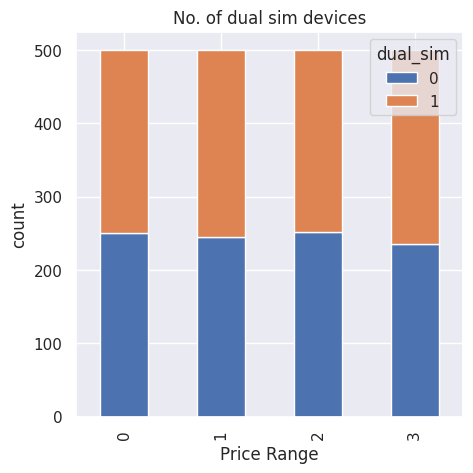

In [ ]:
# Chart - 4 visualization code
#Grouping the data by price range, dual sim and no.of devices in each group
sim_count = mobile_df.groupby(['price_range','dual_sim'])['dual_sim'].count()

sim_count = sim_count.unstack() #Reshaping the values in the dataset

#plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar',stacked=True)
plt.xlabel('Price Range')
plt.ylabel('count')
plt.title('No. of dual sim devices')
plt.show()

##### 1. Why did you pick the specific chart?

Here bar chart is used to show the distribution between price range and sim count.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5
Plotting relationship between Price Range & Battery Power

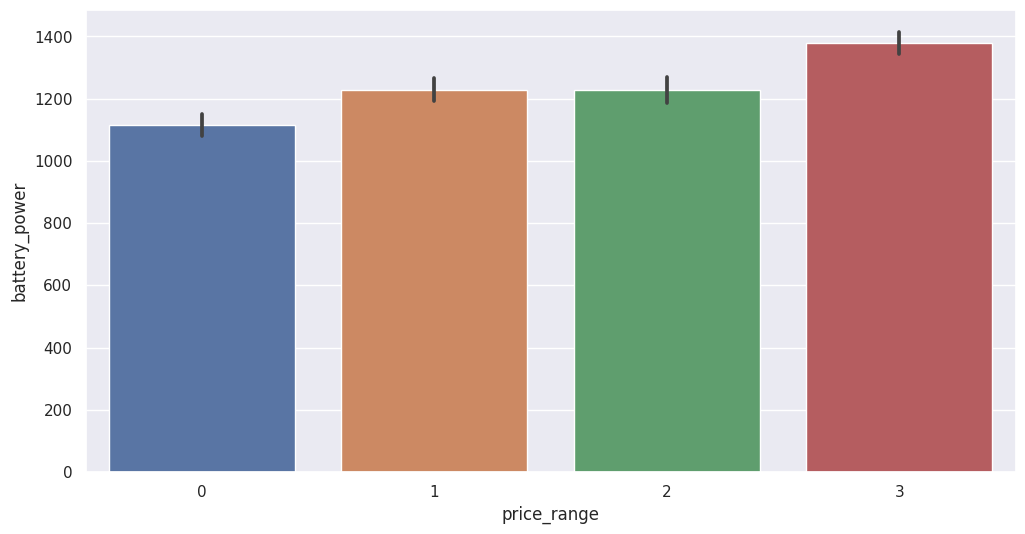

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='battery_power',data=mobile_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

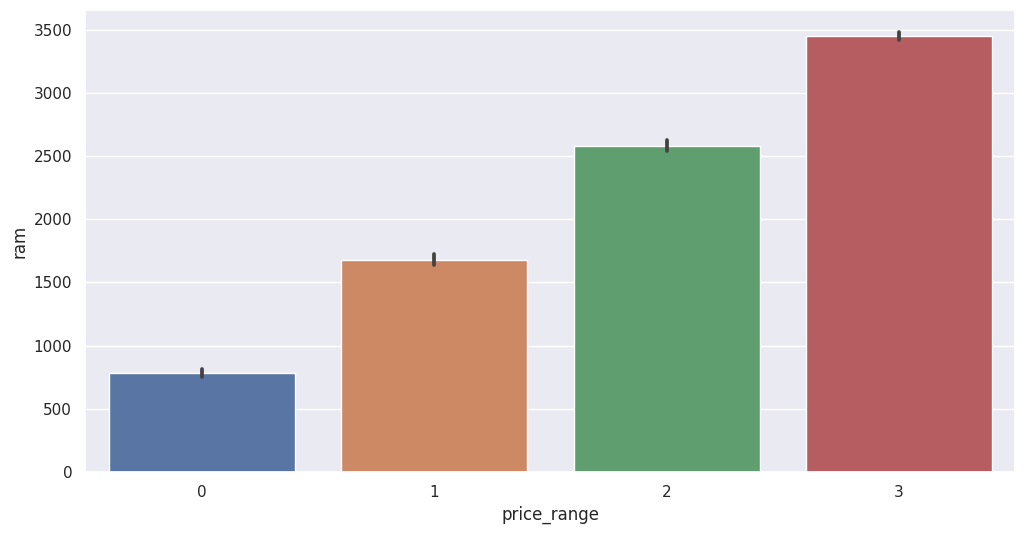

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='ram',data=mobile_df)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

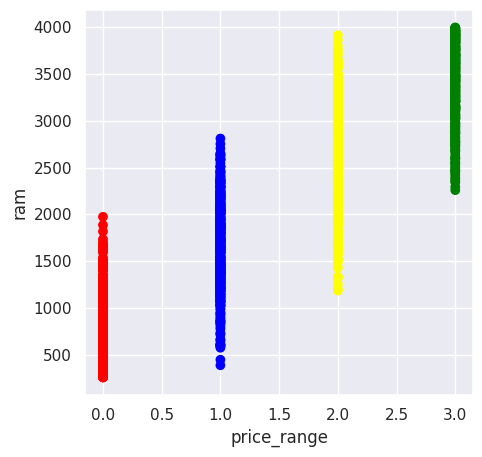

In [ ]:
# Chart - 7 visualization code
colors = {0: 'red',1:'blue', 2:'yellow', 3:'green'}

plt.scatter(mobile_df['price_range'],mobile_df['ram'],c=mobile_df['price_range'].apply(lambda x:colors[x]))
plt.xlabel('price_range')
plt.ylabel('ram')
plt.show()

##### 1. Why did you pick the specific chart?

Here Scatter plot is used to know the seperation of values(mobiles) based on RAM

##### 2. What is/are the insight(s) found from the chart?

Chart shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests based on amount of RAM in the device will impact in the increase of price range as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights gained from the scatter plot, shows the positive correlation between RAM and price range, which can be valuable for businesses. For example, businesses can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increase in business and revenue.

#### Chart - 8

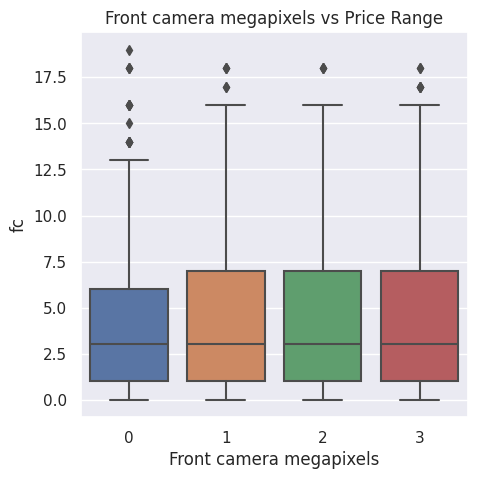

In [ ]:
# Chart - 8 visualization code
#create a boxplot of front camera mp's grouped by price range
sns.boxplot(x='price_range',y='fc',data=mobile_df)
plt.xlabel('Price Range')
plt.xlabel('Front camera megapixels')
plt.title('Front camera megapixels vs Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9
Plotting relation between Price Range & Network (3G)

In [ ]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

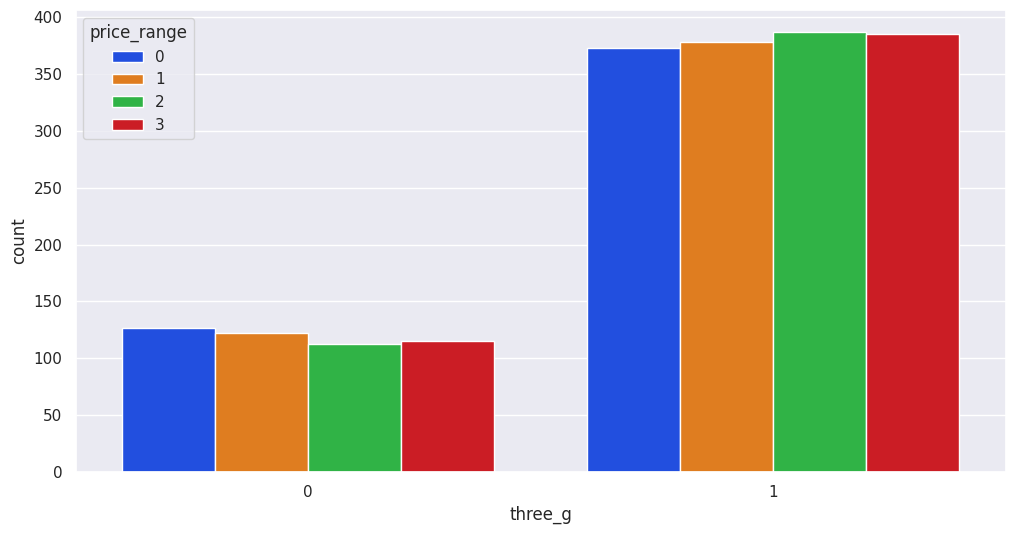

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x=mobile_df['three_g'],hue=mobile_df['price_range'],palette='bright')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

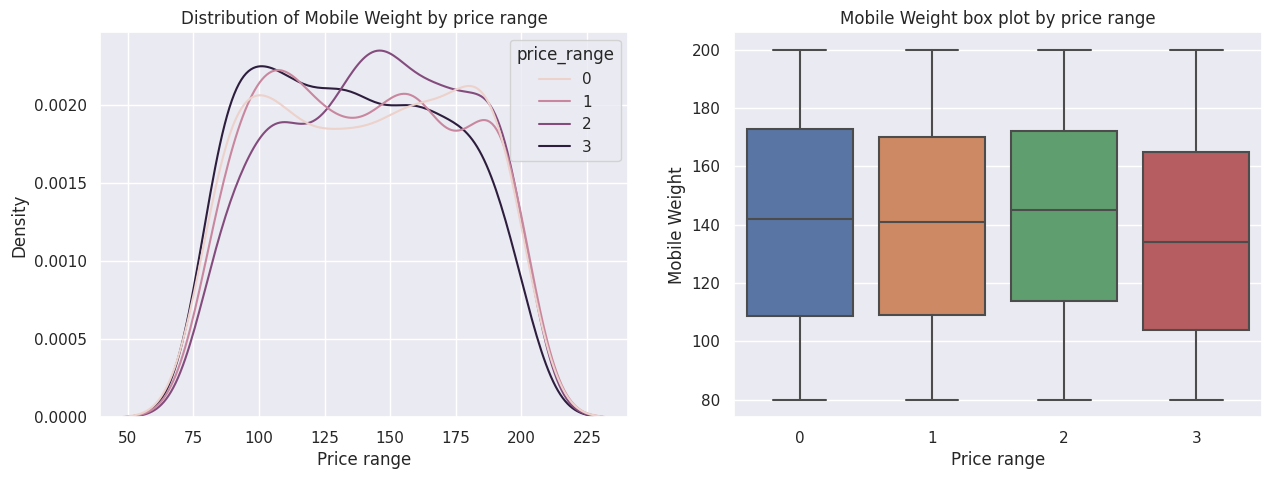

In [ ]:
# Chart - 10 visualization code
#set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(15,5))

#create kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=mobile_df,x='mobile_wt',hue="price_range",ax=axs[0])

#create a box plot
sns.boxplot(data=mobile_df,x='price_range',y="mobile_wt",ax=axs[1])

#set the x-label for both the subplots
for ax in axs:
  ax.set_xlabel('Price range')

#set y-label for box plot subplot
axs[1].set_ylabel('Mobile Weight')

#set the title for the subplots
axs[0].set_title('Distribution of Mobile Weight by price range')
axs[1].set_title('Mobile Weight box plot by price range')

#Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Screen Size


In [ ]:
# Chart - 11 visualization code
#Defining a new variable "sc_size" as the diagonal screen size in inches
mobile_df['sc_size'] = np.sqrt((mobile_df['sc_h']**2)+(mobile_df['sc_w']**2))

#Converting the screen size from CM to INCHES and round off the values
mobile_df['sc_size'] = round(mobile_df['sc_size']/2.54,2)

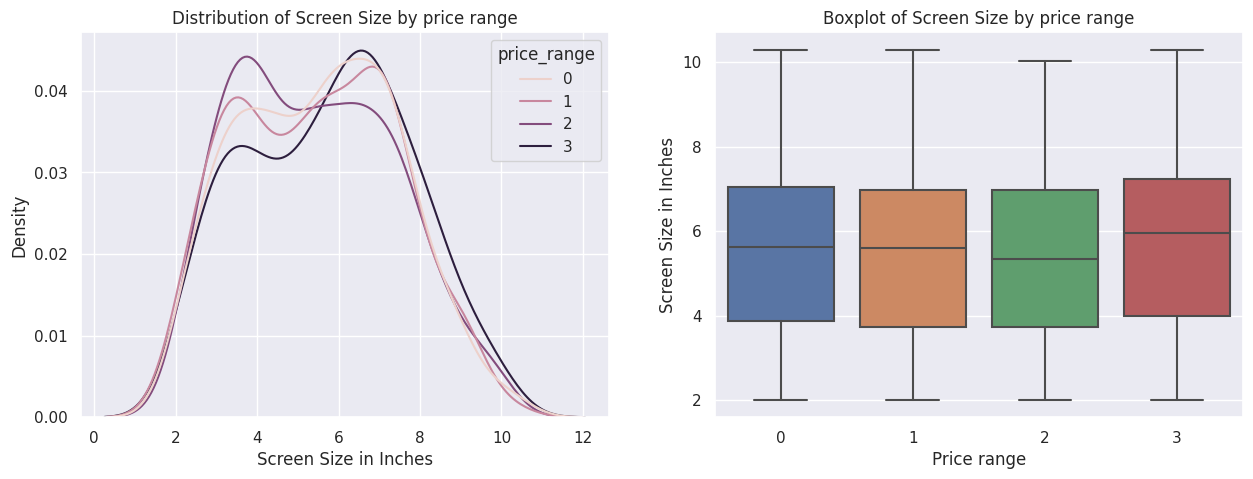

In [ ]:
#create a new variable sc_size in inches
mobile_df['sc_size'] = np.sqrt((mobile_df['sc_h']**2)+(mobile_df['sc_w']**2))/2.54
mobile_df['sc_size'] = mobile_df['sc_size'].round(2)

#Plot the distribution and boxplot of screensize by price range
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(data=mobile_df,x='sc_size',hue='price_range',ax=axs[0])
sns.boxplot(data=mobile_df,x='price_range',y='sc_size',ax=axs[1])

#set axis lables and title
axs[0].set_xlabel('Screen Size in Inches')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Screen Size by price range')
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Screen Size in Inches')
axs[1].set_title('Boxplot of Screen Size by price range')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

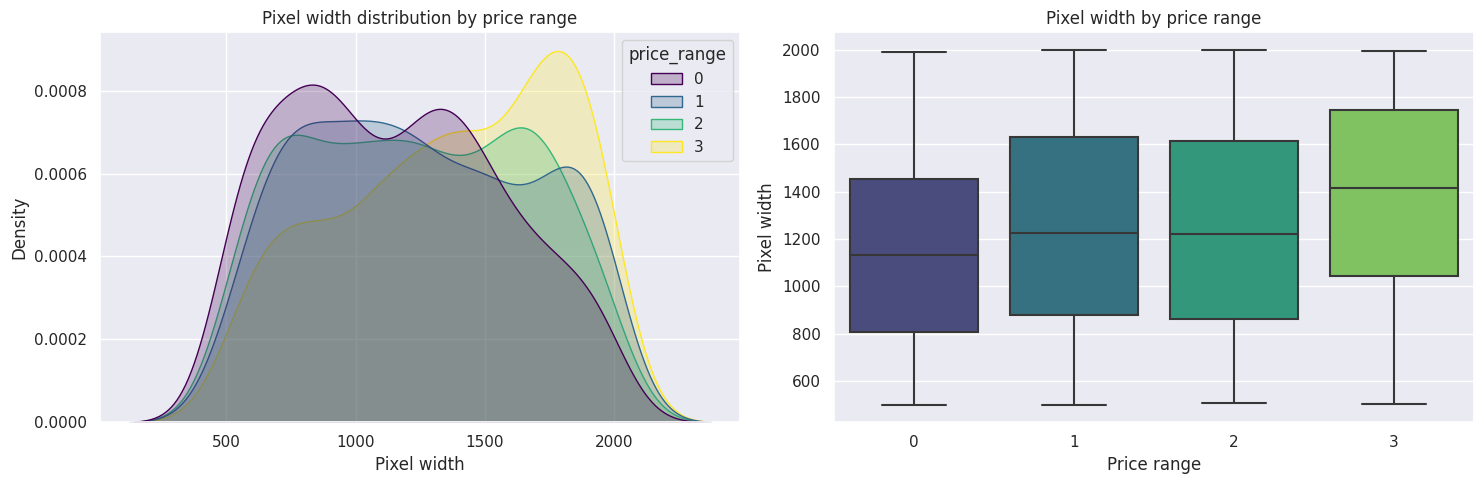

In [ ]:
# Chart - 12 visualization code
#set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(15,5))

#create kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=mobile_df,x='px_width',hue="price_range",fill=True,common_norm=False, palette='viridis',ax=axs[0])
axs[0].set_xlabel('Pixel width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel width distribution by price range')

#create a box plot
sns.boxplot(data=mobile_df,x='price_range',y="px_width", palette='viridis',ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Pixel width')
axs[1].set_title('Pixel width by price range')

plt.tight_layout() #Adjust the layout
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

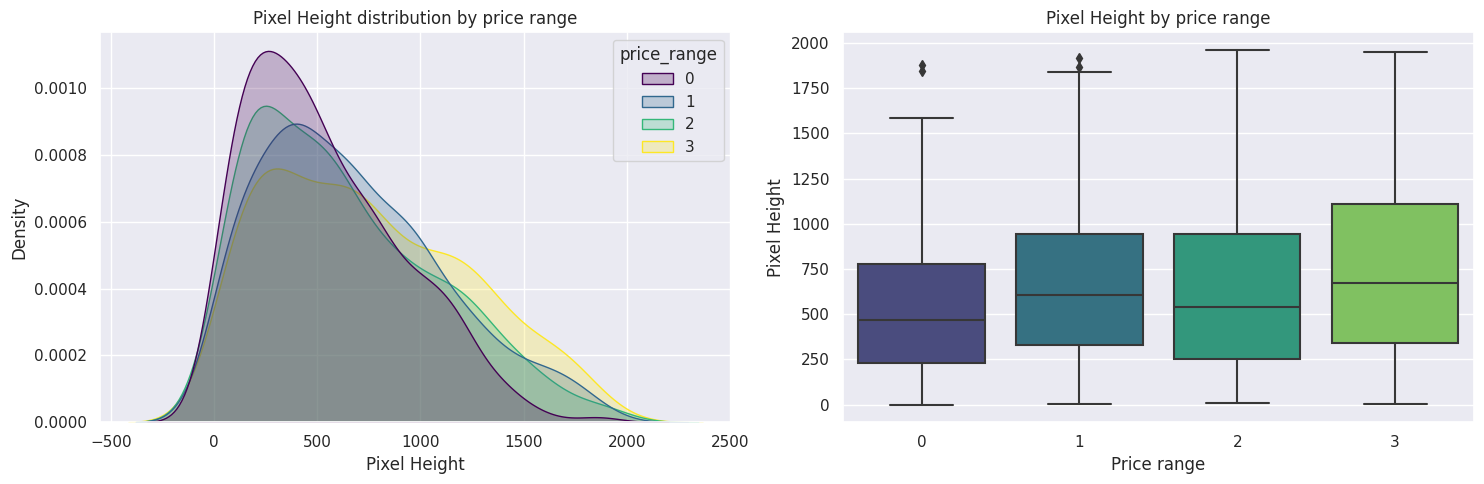

In [ ]:
# Chart - 13 visualization code
#set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(15,5))

#create kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=mobile_df,x='px_height',hue="price_range",fill=True,common_norm=False, palette='viridis',ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height distribution by price range')

#create a box plot
sns.boxplot(data=mobile_df,x='price_range',y="px_height", palette='viridis',ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by price range')

plt.tight_layout() #Adjust the layout
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

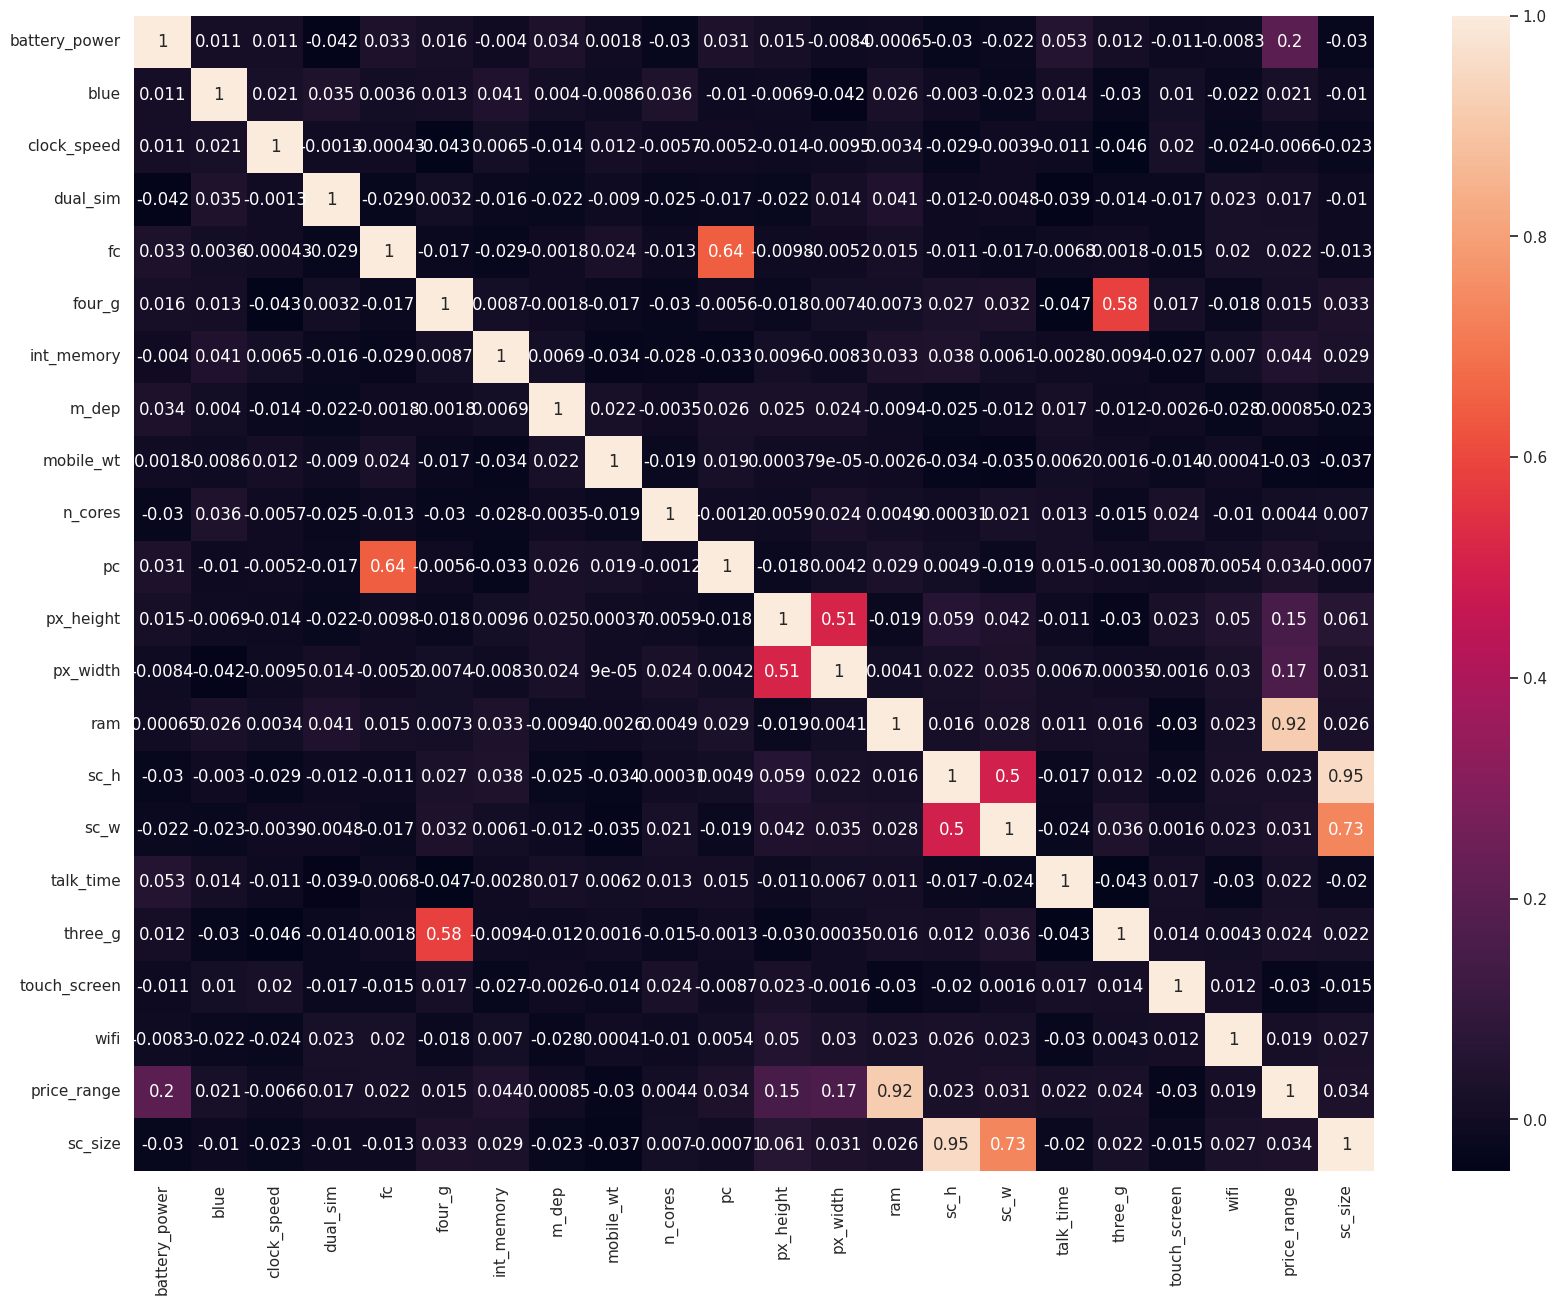

In [ ]:
# Correlation Heatmap visualization code to check multi collinearity

plt.figure(figsize=[20,15])
sns.heatmap(mobile_df.corr(),annot=True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Calculate observed frequency distribution & expected frequency distribution
obs_freq = mobile_df['price_range'].value_counts().values
total = len(mobile_df)
exp_freq = [total/4]*4

#perform chi-square test
chi2, p = stats.chisquare(obs_freq,f_exp=exp_freq)

#Print Results
print(f'Chi-Square Statistic:{chi2},P-Value:{p}')

Chi-Square Statistic:0.0,P-Value:1.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Calculate Contingency table and Print the Values
contingency_table = pd.crosstab(mobile_df['price_range'],mobile_df['three_g'])
print(contingency_table)

#perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

#Print Results
print(f'Chi-Square Statistic:',chi2)
print('P-Value:',p_value)

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-Square Statistic: 1.3737644035343461
P-Value: 0.7116958581372179


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the above process, we have calculated null values in each columns and sum up the null value.

From the above statistics, we found No missing value available.

### 2. Handling Outliers

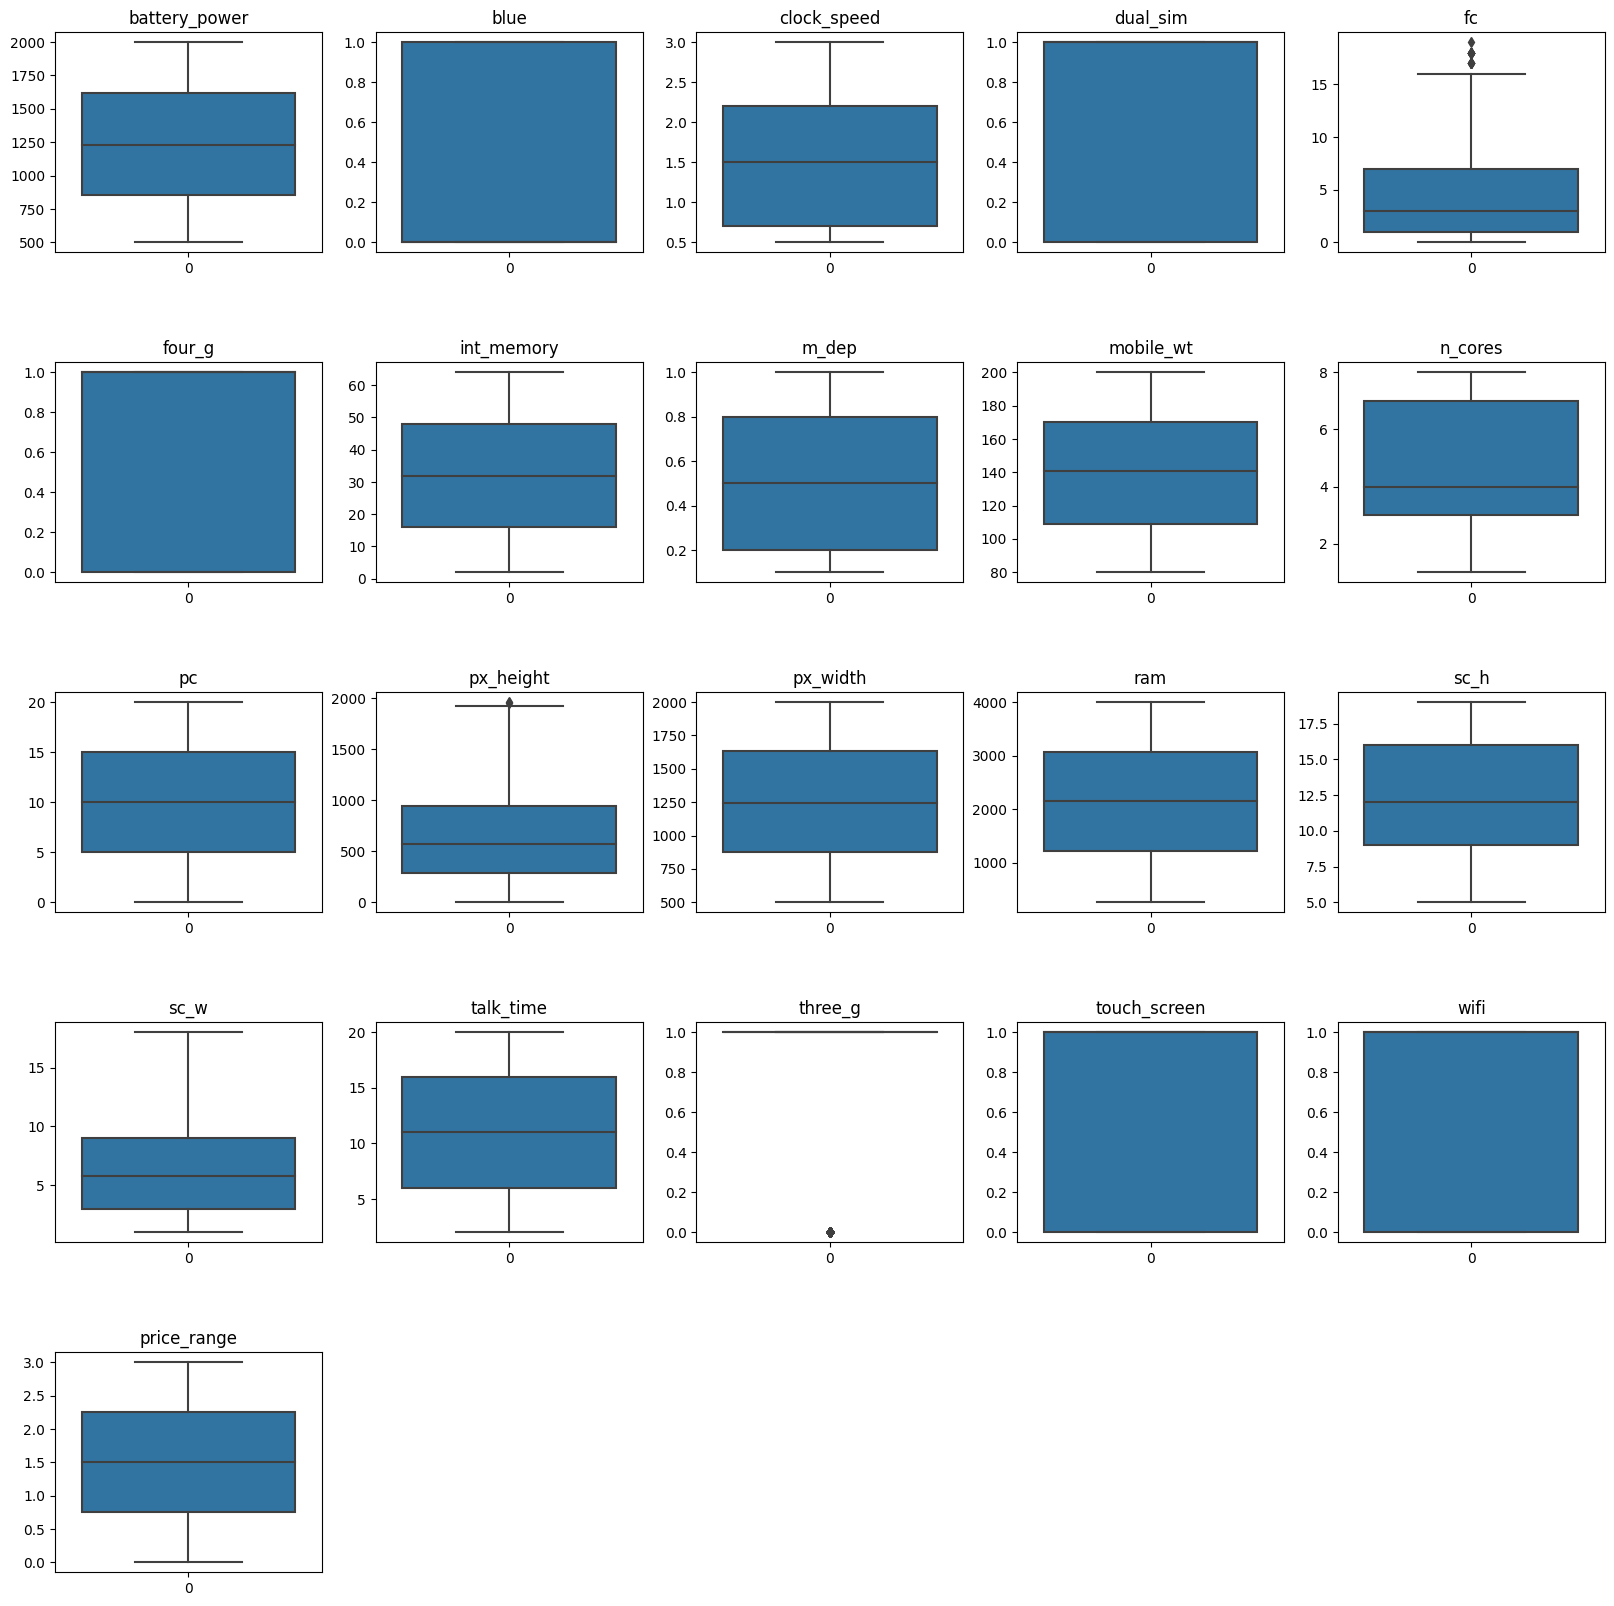

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(20,20))

#Create loop through each column then create subplot & boxplot
for index,item in enumerate([i for i in mobile_df.describe().columns.to_list()]):
  plt.subplot(5,5,index+1)
  sns.boxplot(mobile_df[item])
  plt.title(item)
  plt.subplots_adjust(hspace=0.5)

print('\n')

##### What all outlier treatment techniques have you used and why did you use those techniques?

From the above results, we clearly see there are not much outliers in the data.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

All features have integers or float, so there is no necessity to do categorical encoding.

### 4. Data Transformation

In [ ]:
#Doing transformation to avoid Overfitting
mobile_df.drop(['px_height','px_width'], axis = 1, inplace=True)

#Define X & Y
x = mobile_df.drop(['price_range'],axis=1)
y = mobile_df['price_range']

KeyError: ignored

In [ ]:
x.shape

(2000, 18)

In [ ]:
y.shape

(2000,)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

 It is important to drop the columns which doesn't have much value in the analysis.

### 5. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?



*   The method we used here to scale here is MinMaxScaler, it will generally scale down the values into specified range of 0 and 1.

* MinMaxScaler is also useful in finding outliers and treating them.


* MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.


### 6. Data Splitting

In [ ]:

#Define X & Y
x = mobile_df.drop(['price_range'],axis=1)
y = mobile_df['price_range']

In [ ]:
x.shape

(2000, 18)

In [ ]:
y.shape

(2000,)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(1600, 18)

In [ ]:
y_train.shape

(1600,)

##### What data splitting ratio have you used and why?

* From the above code, we clearly see that dataset splits into 80% as Train and 20% as Test, by assigning the parameter test_size=0.2 to split in the ratio of 80:20

* This ratio is mostly used splitting ratio in the field of machine learning, why because 80 % data is assigning for model to train and to learn enough from the data and 20 % of test data is more than enough to test the model performance.


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Predict on the model
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

#creating the report on test set
from sklearn.metrics import classification_report
print('Classification report on test set')
print(classification_report(y_pred_test,y_test))


Classification report on test set
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [ ]:
#creating the evalreport on train set
from sklearn.metrics import classification_report
print('Classification report on train set')
print(classification_report(y_pred_train,y_train))

Classification report on train set
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       421
           1       0.75      0.80      0.77       387
           2       0.73      0.79      0.76       378
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.84      1600



[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


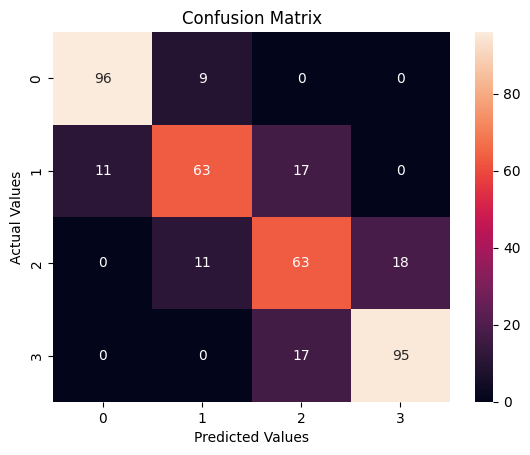

In [ ]:
#Creating the Confusion Matrix and visualizing the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix,annot=True)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* From the above execution, we clearly see that Logistic Regression Model is used for prediction.

* For evaluation metrics, classification report explains about precision,recall, f1-score & support for each class.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
# Fit the Algorithm
lr_model = LogisticRegression()
cv_scores = cross_val_score(lr_model, scaled_x, y, cv=5)

print('Cross-Validation Scores',cv_scores)
print('Average Cross-Validation Scores',np.mean(cv_scores))


Cross-Validation Scores [0.8075 0.825  0.8375 0.8125 0.8125]
Average Cross-Validation Scores 0.819


In [ ]:
lr_model = LogisticRegression()
param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
cv_grid = GridSearchCV(lr_model, param_grid, cv=5)
cv_grid.fit(scaled_x,y)

print('Best Cross-Validation Score',cv_grid.best_score_)
print('Best Parameters',cv_grid.best_params_)
print('Test Set Score',cv_grid.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Cross-Validation Score 0.821
Best Parameters {'C': 10}
Test Set Score 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
#Implementing XG Boost on the dataset
from xgboost import XGBClassifier
xgboost = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgboost.fit(x_train,y_train)
#XGBClassifier

# Predict on the model
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

#creating the report on test set
from sklearn.metrics import classification_report
xg_score = classification_report(y_test,y_pred_test)
print('XG Boost Classification report on test set')
print(xg_score)


XG Boost Classification report on test set
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       108
           1       0.77      0.78      0.77        98
           2       0.72      0.72      0.72        94
           3       0.83      0.86      0.85       100

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [ ]:
#creating the evalreport on train set
from sklearn.metrics import classification_report
xg_score = classification_report(y_train,y_pred_train)
print('XG Boost Classification report on train set')
print(xg_score)


XG Boost Classification report on train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       392
           1       0.99      0.99      0.99       402
           2       0.99      0.99      0.99       406
           3       1.00      0.99      1.00       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm in XGBoost Classifier
xgboost = XGBClassifier()

# Defining the hyperparameter
parameters = {'max_depth':[3,5,7],
              'learning_rate':[0.1,0.01,0.001],
              'n_estimators':[100,500,1000]}

#Cross Validation and Hyper Parameter Tuning and Print the result scores
grid = GridSearchCV(xgboost,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

print('Best Hyperparameter :',grid.best_params_)
print('CV Score :',grid.best_score_)

#Evaluation
y_pred_test = grid.predict(x_test)
score = classification_report(y_test,y_pred_test)
print('Classification report on train set')
print(score)

Best Hyperparameter : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
CV Score : 0.8143750000000001
Classification report on train set
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       108
           1       0.78      0.79      0.78        98
           2       0.72      0.69      0.71        94
           3       0.83      0.87      0.85       100

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



[[97 11  0  0]
 [ 9 77 12  0]
 [ 0 11 65 18]
 [ 0  0 13 87]]


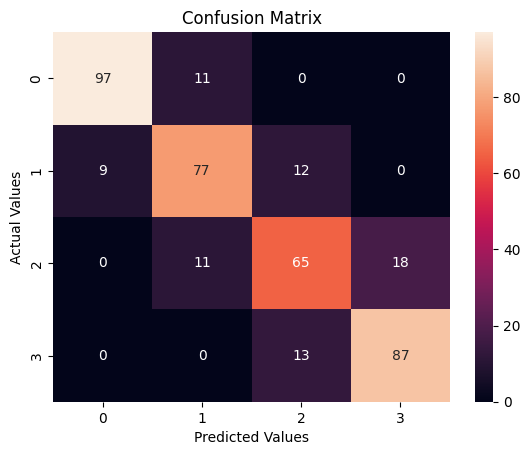

In [ ]:
#Creating the Confusion Matrix and visualizing the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix,annot=True)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
#Evaluation
score = classification_report(y_train ,y_pred_train)
print('Classification report on train set')
print(score)

Classification report on test set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       392
           1       0.99      0.99      0.99       402
           2       0.99      0.99      0.99       406
           3       1.00      0.99      1.00       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report

# Fit the Algorithm
rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(x_train,y_train)

# Predict on the model
y_pred_train = rf_classifier.predict(x_train)
y_pred = rf_classifier.predict(x_test)

train_score = accuracy_score(y_train,y_pred_train)
test_score = accuracy_score(y_test,y_pred)

print('Train Score',train_score)
print('Test Score',test_score)

Train Score 1.0
Test Score 0.825


In [ ]:
#Evaluation on Classification Report
score = classification_report(y_test ,y_pred)
print('Classification report on test set')
print(score)

Classification report on test set
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       108
           1       0.81      0.77      0.79        98
           2       0.72      0.72      0.72        94
           3       0.84      0.88      0.86       100

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



[[99  9  0  0]
 [ 9 75 14  0]
 [ 0  9 68 17]
 [ 0  0 12 88]]


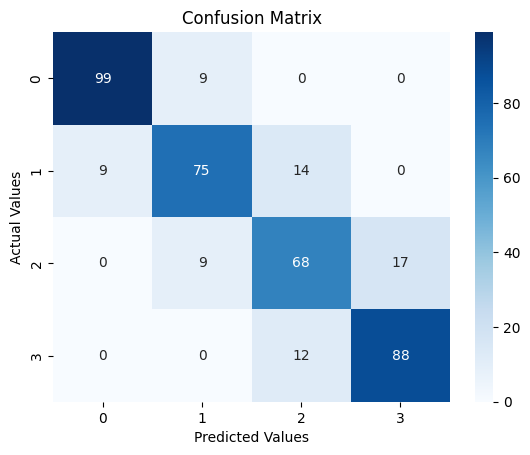

In [ ]:
#Creating the Confusion Matrix and visualizing the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix,annot=True,cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')
plt.show()

### **FEATURES STORED**

In [ ]:
feature_importance = pd.DataFrame({'Feature':x.columns,'Score':rf_classifier.feature_importances_}).sort_values(by='Score',ascending=False).reset_index(drop=True)

feature_importance.head()

,Feature,Score
0,ram,0.492521
1,battery_power,0.088510
2,mobile_wt,0.050200
3,int_memory,0.045801
4,talk_time,0.037211


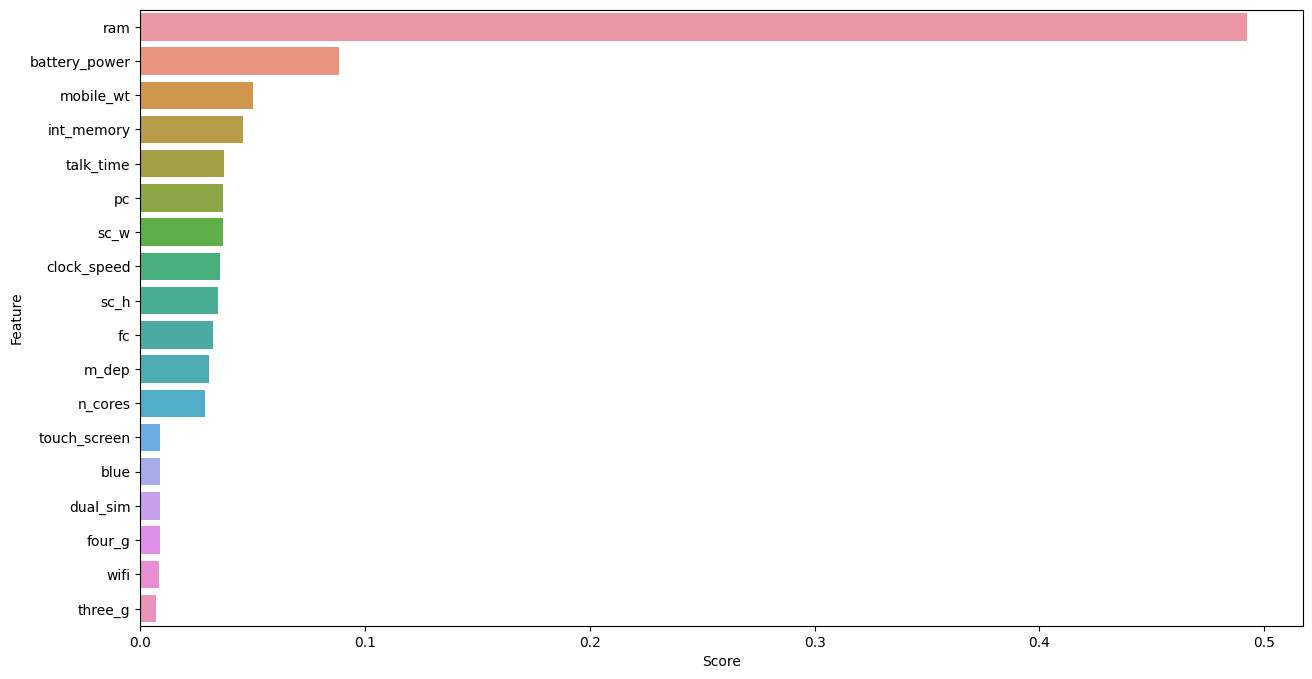

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'],y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, parameters, scoring='accuracy', cv=3)
clsr.fit(x, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
print('Best Parameters ',clsr.best_params_)

print('Best Estimators ',clsr.best_estimator_)

print('Best Score ',clsr.best_score_)

Best Parameters  {'max_depth': 30, 'max_features': 4, 'max_leaf_nodes': 20, 'min_samples_split': 4, 'n_estimators': 50}
Best Estimators  RandomForestClassifier(max_depth=30, max_features=4, max_leaf_nodes=20,
                       min_samples_split=4, n_estimators=50)
Best Score  0.8099981540761151


[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


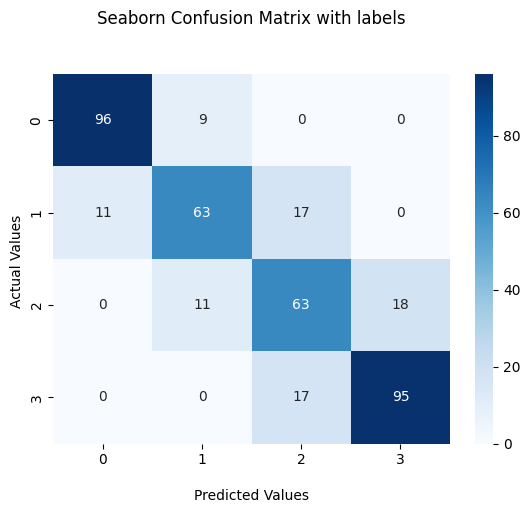

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# accuracy score for Training set
y_pred = clsr.predict(x_train)
accuracy_score(y_train, y_pred)
print(accuracy_score)

print(classification_report(y_train, y_pred))

<function accuracy_score at 0x7bda607f1c60>
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       395
           1       0.88      0.85      0.86       409
           2       0.88      0.84      0.86       408
           3       0.93      0.94      0.93       388

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [ ]:
# accuracy score for Test set
y_pred = clsr.predict(x_test)
accuracy_score(y_test, y_pred)
print(accuracy_score)
print(classification_report(y_test, y_pred))

<function accuracy_score at 0x7bda607f1c60>
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.80      0.73      0.76        91
           2       0.65      0.71      0.68        92
           3       0.86      0.81      0.83       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



### FEATURES STORED

In [ ]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.707321
1,battery_power,0.080347
2,mobile_wt,0.030885
3,int_memory,0.029553
4,talk_time,0.019522


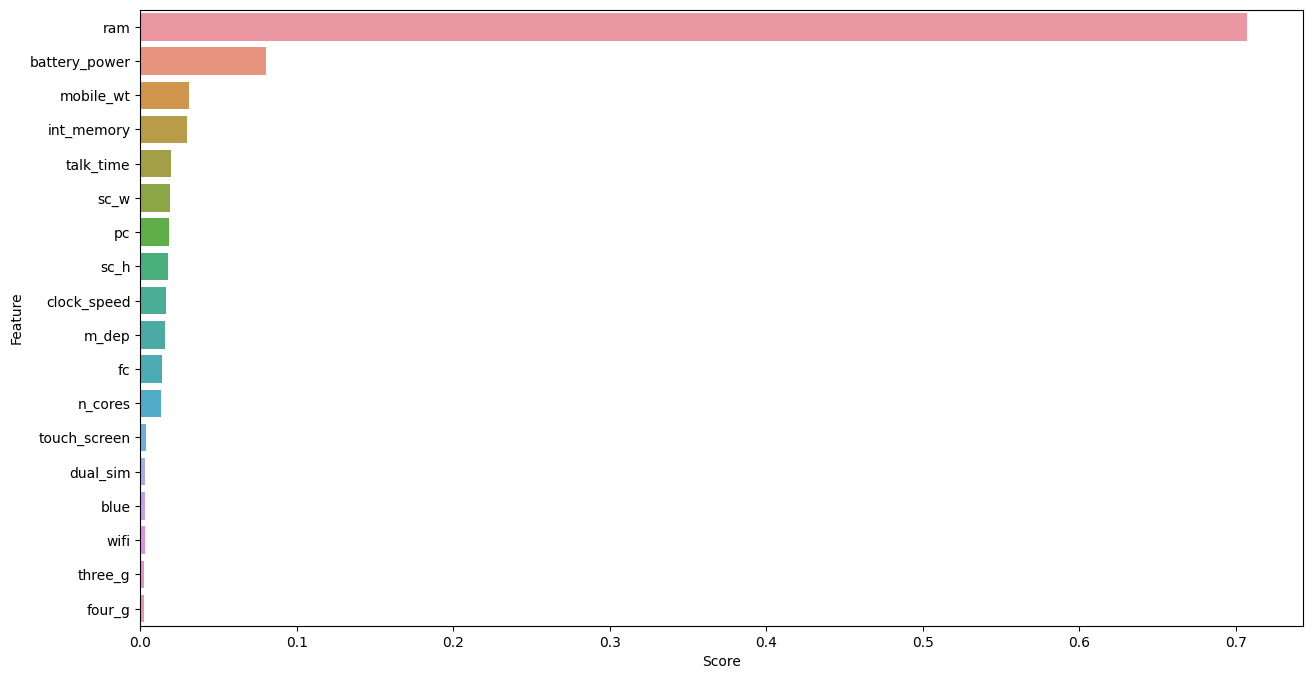

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***